In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
import seaborn as sns
import warnings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [29]:
cancer = pd.read_csv('data.csv')
cancer

ID  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302    17.99     10.38      122.80  1001.0      0.11840   
1      842517    20.57     17.77      132.90  1326.0      0.08474   
2    84300903    19.69     21.25      130.00  1203.0      0.10960   
3    84348301    11.42     20.38       77.58   386.1      0.14250   
4    84358402    20.29     14.34      135.10  1297.0      0.10030   
..        ...      ...       ...         ...     ...          ...   
564    926424    21.56     22.39      142.00  1479.0      0.11100   
565    926682    20.13     28.25      131.20  1261.0      0.09780   
566    926954    16.60     28.08      108.30   858.1      0.08455   
567    927241    20.60     29.33      140.10  1265.0      0.11780   
568     92751     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  symmetry1  ...  texture3  \
0         0.27760     0.30010          0.14710     0.2419  ...     17.33   
1         0.07864     0.08690          0.07017     0.1812  ...     23.41   
2         0.15990     0.19740          0.12790     0.2069  ...     25.53   
3         0.28390     0.24140          0.10520     0.2597  ...     26.50   
4         0.13280     0.19800          0.10430     0.1809  ...     16.67   
..            ...         ...              ...        ...  ...       ...   
564       0.11590     0.24390          0.13890     0.1726  ...     26.40   
565       0.10340     0.14400          0.09791     0.1752  ...     38.25   
566       0.10230     0.09251          0.05302     0.1590  ...     34.12   
567       0.27700     0.35140          0.15200     0.2397  ...     39.42   
568       0.04362     0.00000          0.00000     0.1587  ...     30.37   

     perimeter3   area3  smoothness3  compactness3  concavity3  \
0        184.60  2019.0      0.16220       0.66560      0.7119   
1        158.80  1956.0      0.12380       0.18660      0.2416   
2        152.50  1709.0      0.14440       0.42450      0.4504   
3         98.87   567.7      0.20980       0.86630      0.6869   
4        152.20  1575.0      0.13740       0.20500      0.4000   
..          ...     ...          ...           ...         ...   
564      166.10  2027.0      0.14100       0.21130      0.4107   
565      155.00  1731.0      0.11660       0.19220      0.3215   
566      126.70  1124.0      0.11390       0.30940      0.3403   
567      184.60  1821.0      0.16500       0.86810      0.9387   
568       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  Diagnosis  
0             0.2654     0.4601             0.11890          M  
1             0.1860     0.2750             0.08902          M  
2             0.2430     0.3613             0.08758          M  
3             0.2575     0.6638             0.17300          M  
4             0.1625     0.2364             0.07678          M  
..               ...        ...                 ...        ...  
564           0.2216     0.2060             0.07115          M  
565           0.1628     0.2572             0.06637          M  
566           0.1418     0.2218             0.07820          M  
567           0.2650     0.4087             0.12400          M  
568           0.0000     0.2871             0.07039          B  

[569 rows x 32 columns]

In [30]:
label_encoder = preprocessing.LabelEncoder() 
cancer['Diagnosis_Encoded']= label_encoder.fit_transform(cancer['Diagnosis'])


In [31]:
cancer.drop('Diagnosis',axis=1, inplace=True)

In [32]:
#plt.figure(figsize=(2,8))
#sns.regplot(x=cancer["Diagnosis_Encoded"], y=cancer["concave_points1"], color = 'purple')
#plt.show()

In [33]:
y = cancer[['Diagnosis_Encoded']]
x = cancer.drop(columns=['Diagnosis_Encoded','ID',], axis=1)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=49)

In [50]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 517 to 275
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Diagnosis_Encoded  171 non-null    int32
dtypes: int32(1)
memory usage: 2.0 KB


In [23]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train.values.ravel())
predictions = nb_model.predict(x_test)

In [24]:
print("NaiveBayes Accuracy:",accuracy_score(y_test, predictions))
print("NaiveBayes Precision:",precision_score(y_test, predictions))
print("NaiveBayes Recall:",recall_score(y_test, predictions))
print("NaiveBayes F1-score:",f1_score(y_test, predictions))

NaiveBayes Accuracy: 0.9122807017543859
NaiveBayes Precision: 0.9310344827586207
NaiveBayes Recall: 0.8307692307692308
NaiveBayes F1-score: 0.8780487804878049


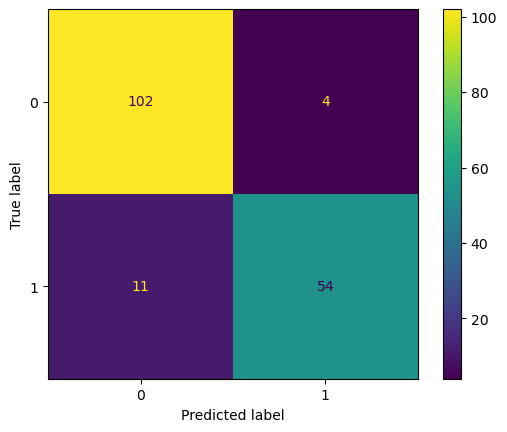

In [25]:
cm = confusion_matrix(y_test, predictions,labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot()
plt.show()

In [26]:
 y_score = nb_model.predict_proba(x_test)[:,1]

In [10]:
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_score)
print('roc_auc_score  Random Forest: ', roc_auc_score(y_test, y_score))

roc_auc_score  Random Forest:  0.982510885341074


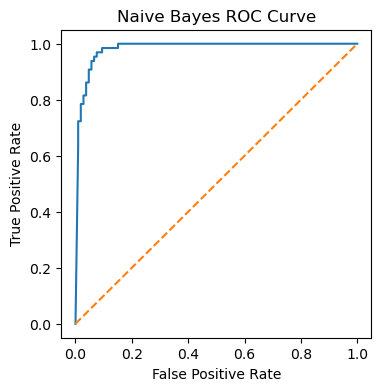

In [11]:
plt.subplots(1, figsize=(4,4))
plt.title('Naive Bayes ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()